# Installing prerequisites

## Installing Selenium headless Chrome driver

In [1]:
#!/usr/bin/bash

!echo "Update the repository and any packages..."
!sudo apt update && sudo apt upgrade -y

!echo "Install prerequisite system packages..."
!sudo apt install wget curl unzip jq -y

# Set metadata for Google Chrome repository...
!wget https://storage.googleapis.com/chrome-for-testing-public/122.0.6261.94/linux64/chrome-linux64.zip

!echo "Install Chrome dependencies..."
!sudo apt install ca-certificates fonts-liberation \
    libappindicator3-1 libasound2 libatk-bridge2.0-0 libatk1.0-0 libc6 \
    libcairo2 libcups2 libdbus-1-3 libexpat1 libfontconfig1 libgbm1 \
    libgcc1 libglib2.0-0 libgtk-3-0 libnspr4 libnss3 libpango-1.0-0 \
    libpangocairo-1.0-0 libstdc++6 libx11-6 libx11-xcb1 libxcb1 \
    libxcomposite1 libxcursor1 libxdamage1 libxext6 libxfixes3 libxi6 \
    libxrandr2 libxrender1 libxss1 libxtst6 lsb-release wget xdg-utils -y

!echo "Unzip the binary file..."
!unzip chrome-linux64.zip

!echo "Downloading latest Chromedriver..."
!wget https://storage.googleapis.com/chrome-for-testing-public/122.0.6261.94/linux64/chromedriver-linux64.zip

!echo "Unzip the binary file and make it executable..."
!unzip chromedriver-linux64.zip

!echo "Install Selenium..."
!python3 -m pip install selenium

!echo "Removing archive files"
!rm chrome-linux64.zip  chromedriver-linux64.zip

Update the repository and any packages...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [50.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,517 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,796 kB]
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,074 kB]
Hit:13 h

# LaVague

In [2]:
!wget https://raw.githubusercontent.com/dhuynh95/LaVague/main/requirements.txt
!pip install -r requirements.txt

--2024-03-02 18:18:37--  https://raw.githubusercontent.com/dhuynh95/LaVague/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     190  --.-KB/s    in 0s      

2024-03-02 18:18:38 (16.4 MB/s) - ‘requirements.txt’ saved [190/190]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.2/488.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB

In [3]:
from llama_index.llms.huggingface import HuggingFaceInferenceAPI
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')

if not HF_TOKEN:
  from getpass import getpass
  HF_TOKEN = getpass('Enter your HF Token (https://huggingface.co/docs/hub/en/security-tokens): ')

model_id = "NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO"
max_new_tokens = 512
llm = HuggingFaceInferenceAPI(model_name=model_id, token=HF_TOKEN, num_output=max_new_tokens)

embed_model = "BAAI/bge-small-en-v1.5"
embedder = HuggingFaceEmbedding(model_name=embed_model, device="cuda")

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [4]:
!wget https://raw.githubusercontent.com/dhuynh95/LaVague/main/prompt_template.txt

with open("prompt_template.txt", "r") as file:
  PROMPT_TEMPLATE_STR = file.read()

--2024-03-02 18:21:31--  https://raw.githubusercontent.com/dhuynh95/LaVague/main/prompt_template.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6248 (6.1K) [text/plain]
Saving to: ‘prompt_template.txt’

prompt_template.txt 100%[===================>]   6.10K  --.-KB/s    in 0s      

2024-03-02 18:21:31 (85.0 MB/s) - ‘prompt_template.txt’ saved [6248/6248]



In [5]:
from llama_index.core import Document
from llama_index.core.node_parser import CodeSplitter
from llama_index.retrievers.bm25 import BM25Retriever
from llama_index.core import VectorStoreIndex
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core import get_response_synthesizer
from llama_index.core import PromptTemplate
import time
import logging

MAX_CHARS = 1500
K = 3

class ActionEngine:
    def __init__(self, llm, embedding):
        self.llm = llm
        self.embedding = embedding

    def _get_index(self, html):
        text_list = [html]
        documents = [Document(text=t) for t in text_list]

        splitter = CodeSplitter(
            language="html",
            chunk_lines=40,  # lines per chunk
            chunk_lines_overlap=200,  # lines overlap between chunks
            max_chars=MAX_CHARS,  # max chars per chunk
        )
        nodes = splitter.get_nodes_from_documents(documents)
        nodes = [node for node in nodes if node.text]

        index = VectorStoreIndex(nodes, embed_model=self.embedding)

        return index

    def get_action(self, query, state):
        html = state
        index = self._get_index(html)

        retriever = BM25Retriever.from_defaults(
            index=index,
            similarity_top_k=K,
        )

        response_synthesizer = get_response_synthesizer(llm=self.llm)

        # assemble query engine
        query_engine = RetrieverQueryEngine(
            retriever=retriever,
            response_synthesizer=response_synthesizer,
        )

        prompt_template = PromptTemplate(PROMPT_TEMPLATE_STR)

        query_engine.update_prompts(
            {"response_synthesizer:text_qa_template": prompt_template}
        )

        logging.debug("Querying LLM...")

        output = query_engine.query(query)

        code = output.response.split("```")[0]

        return code

In [6]:
def execute_instructions(instructions, action_engine, driver, clear_display=True):
    for instruction in instructions:
        driver.save_screenshot('screenshot.png')
        if clear_display:
            clear_output(wait=True)
        display(Image(filename="screenshot.png"))
        logging.debug(f"Processing instruction: {instruction}")
        code = action_engine.get_action(instruction, driver.page_source)
        logging.debug(f"Code received: {code}")
        try:
            start_time = time.time()

            exec(code)

            end_time = time.time()
            execution_time = end_time - start_time
            logging.debug(f"Code execution time: {execution_time} seconds")

            logging.debug("Code execution successful")

        except Exception as e:
            logging.error(f"Error executing code: {e}")
        driver.save_screenshot('screenshot.png')
        if clear_display:
            clear_output(wait=True)
        display(Image(filename="screenshot.png"))

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

from IPython.display import Image, display, clear_output

## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--window-size=1600,900")

# Set path to chrome/chromedriver as per your configuration
chrome_options.binary_location = "/content/chrome-linux64/chrome"
webdriver_service = Service("/content/chromedriver-linux64/chromedriver")

# Choose Chrome Browser
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)

action_engine = ActionEngine(llm, embedder)

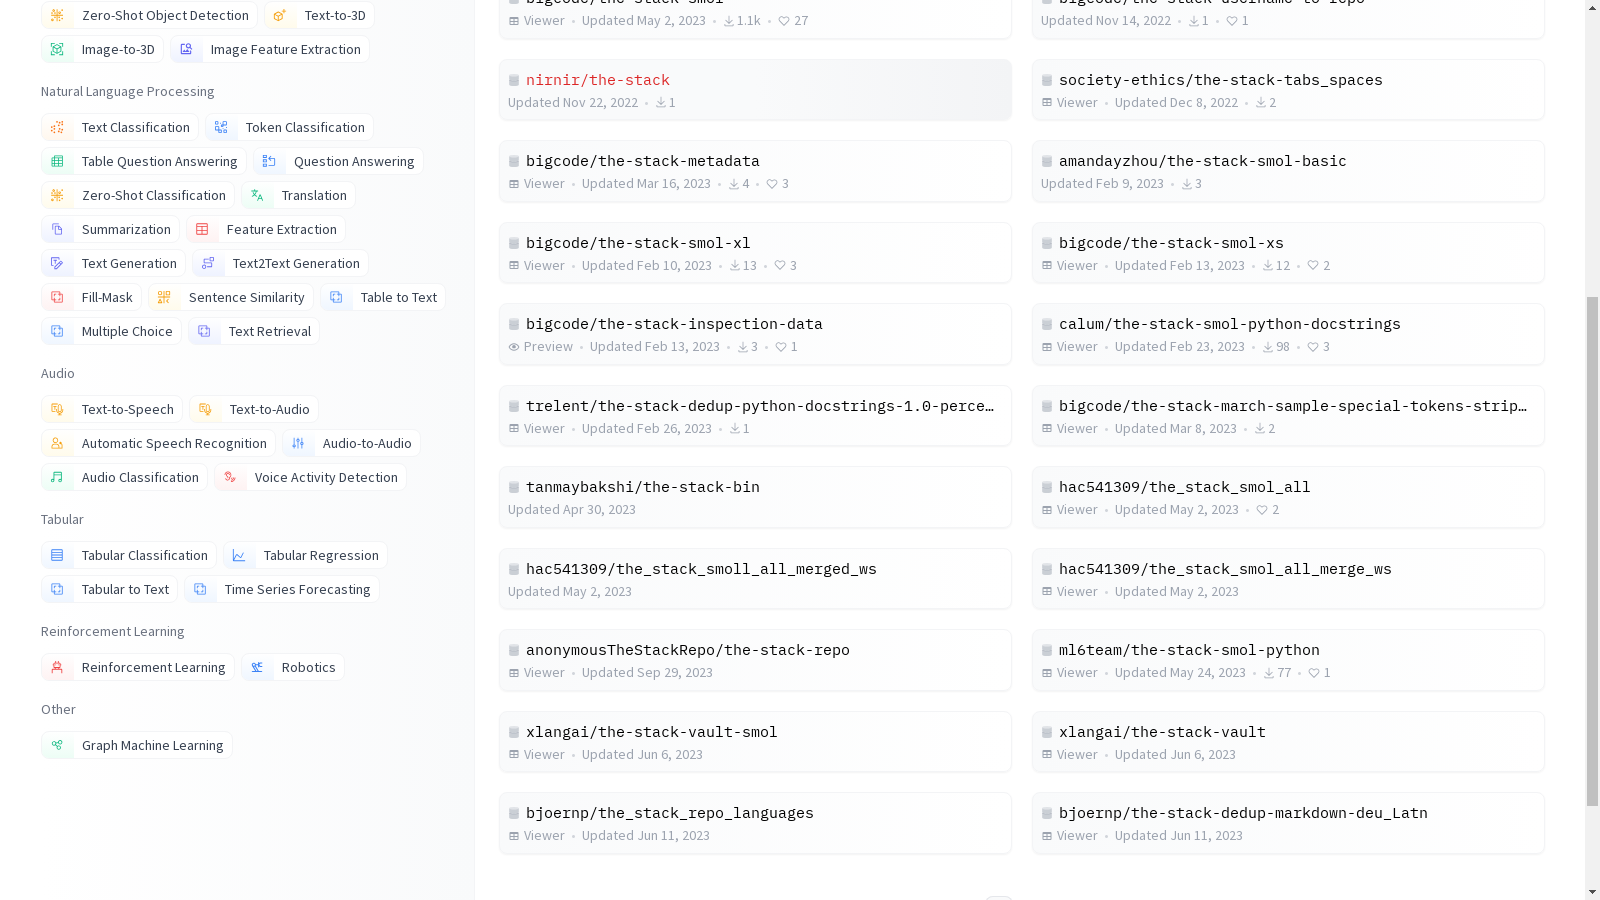

In [8]:
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)
driver.get("https://huggingface.co/")

instructions = ["Click on the Datasets item on the menu, between Models and Spaces",
                "Click on the search bar 'Filter by name', next to Datasets, type 'The Stack', and press the 'Enter' key",
                "Scroll by 500 pixels",]

execute_instructions(instructions, action_engine, driver)

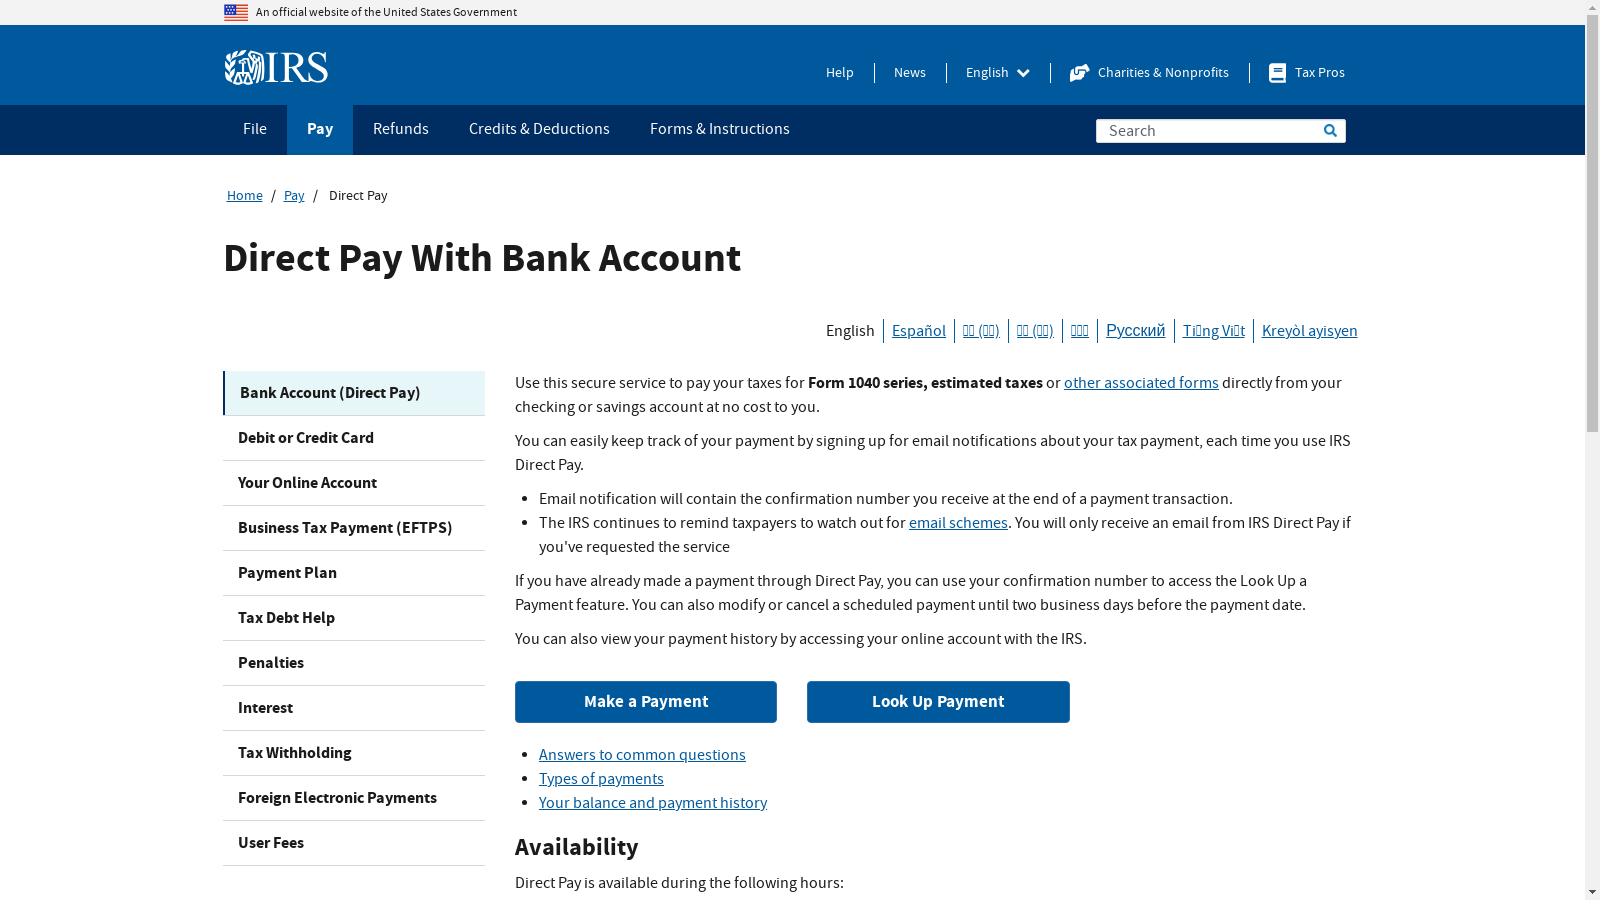

In [9]:
driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)
driver.get("https://www.irs.gov/")

instructions = ["Click on the 'Pay' item on the menu, between 'File' and 'Refunds'",
                "Click on 'Pay Now with Direct Pay' just below 'Pay from your Bank Account'",
                "Click on 'Make a Payment', next to 'Look Up Payment'",]

execute_instructions(instructions, action_engine, driver)